In [1]:
# 將所有檔案名稱讀取
path = './train'
X = []
import os
for root, dirs, files in os.walk(path):
    for f in files:
        X.append(root+ '/'+ f)

In [3]:
# y
import pandas as pd
y = pd.read_csv('train_labels.csv')
y

,filename,infected
0,00000.jpg,1
1,00001.jpg,1
2,00002.jpg,1
3,00003.jpg,0
4,00004.jpg,0
...,...,...
21760,21760.jpg,0
21761,21761.jpg,0
21762,21762.jpg,0
21763,21763.jpg,0


In [4]:
# y_train 數據 list comprehension
from tqdm import tqdm
files = [x.split('/')[-1] for x in X]
y_train = []

for f in tqdm(files[:]):
    y_train.append( y[y.filename==f]['infected'].values[0])
    
y_train[:3]


100%|███████████████████████████████████████████████████████████████████████████| 21765/21765 [00:41<00:00, 528.49it/s]


[1, 1, 1]

In [5]:
import matplotlib.pyplot as plt
from skimage import color
import numpy as np
from tqdm import tqdm

def read_image(f):
    img = plt.imread(fname=f)
    img_gray = color.rgb2gray(img)
    return(img_gray)
X_train = []
for x in tqdm(X[:]) :
    X_train.append( read_image(x) )
    
X_train = np.array(X_train)  
X_train.shape

100%|███████████████████████████████████████████████████████████████████████████| 21765/21765 [00:49<00:00, 441.52it/s]


(21765, 128, 128)

In [6]:
# X_train.shape = 21765, 128, 128
# y_train.shape = 21765, 2

In [7]:
# 套入Keras.Api -- tensorflow
import keras
from keras.utils  import np_utils
from keras.optimizers import Adam
from keras.layers import Dense, Activation #神經層

In [8]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, hidden layer
model.add(Dense(units=256, input_dim=128*128, 
                kernel_initializer='normal', activation='relu'))
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=2, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4194560   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 4,235,842
Trainable params: 4,235,842
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 將 training 的 label 進行 one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(X_train.shape[0], 128*128).astype('float32')


X_train_norm = X_train_2D

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=X_train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=40, 
                          batch_size=800,
                          verbose=0)

print('Done!!')

Done!!


In [10]:
# 訓練成果
scores = model.evaluate(X_train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

681/681 [==============================] - 6s 9ms/step - loss: 0.4697 - accuracy: 0.7763

	[Info] Accuracy of testing data = 77.6%


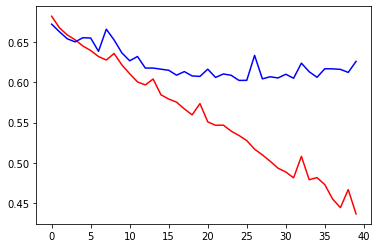

In [11]:
%matplotlib inline
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

# 紅: 拿 training data自己訓練自己，所以不准
# 藍: data中有 20% 在做 evaluate，這是要看的

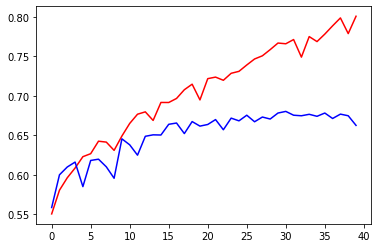

In [12]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()

# 紅: 一直往上升
# 藍: 上不去，所以可能不用訓練那麼多次

In [ ]:
# 下次將改用 CNN 再做一次